# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)

In [2]:
df = pd.read_csv("../data/open_meteo_tokyo_multivariative.csv")
df.head()

,time,weather_code,temperature_max,temperature_min,temperature_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1940-01-02,3,3.5,-1.9,0.5,-0.1,-4.9,-3.0,1940-01-01T21:50,1940-01-02T07:38,...,23319.52,0.0,0.0,0.0,0.0,10.0,16.2,21,5.05,0.65
1,1940-01-03,1,9.3,-0.8,3.1,5.9,-4.8,-0.4,1940-01-02T21:51,1940-01-03T07:39,...,31386.91,0.0,0.0,0.0,0.0,17.0,26.6,196,10.72,1.28
2,1940-01-04,1,9.6,1.3,5.0,5.4,-1.9,1.3,1940-01-03T21:51,1940-01-04T07:40,...,31522.01,0.0,0.0,0.0,0.0,17.5,31.3,218,11.43,1.58
3,1940-01-05,1,14.5,-0.4,5.8,10.5,-3.9,2.3,1940-01-04T21:51,1940-01-05T07:41,...,31531.86,0.0,0.0,0.0,0.0,26.6,46.1,240,11.42,1.65
4,1940-01-06,51,10.4,0.4,4.3,8.2,-2.3,1.6,1940-01-05T21:51,1940-01-06T07:42,...,30139.26,0.1,0.1,0.0,1.0,15.2,28.4,12,8.05,0.96


In [3]:
df.isna().sum()

time                           0
weather_code                   0
temperature_max                0
temperature_min                0
temperature_mean               0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

In [50]:
x = np.arange(df.shape[0])
y = np.array(df['temperature_mean'])

coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)

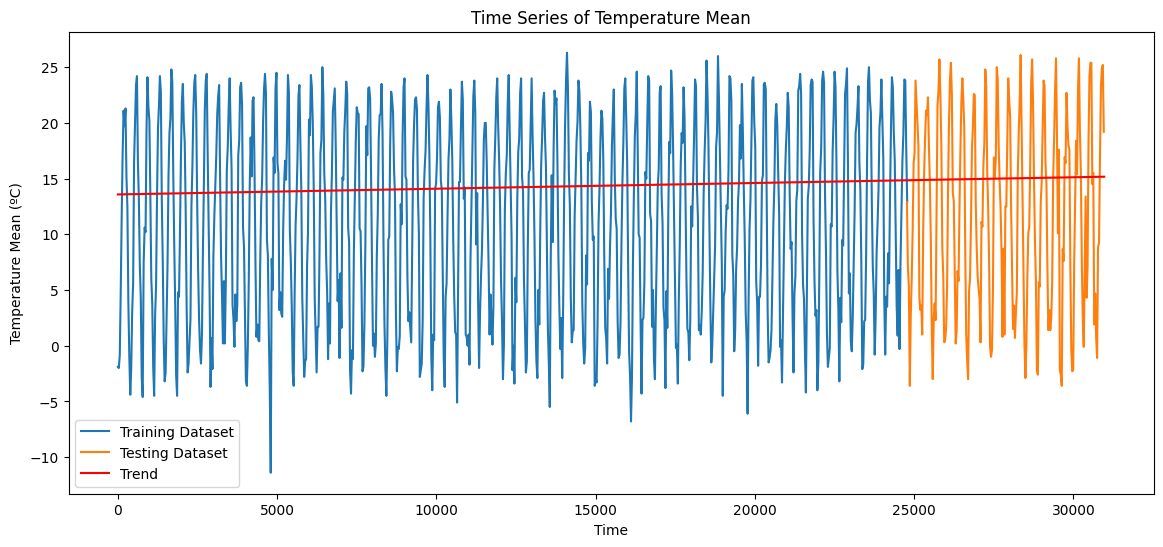

In [52]:
plt.figure(figsize=(14, 6))

plt.plot(df['temperature_min'][:int(df.shape[0] * 0.8)+30:30])
plt.plot(df['temperature_min'][int(df.shape[0] * 0.8)::30])
plt.plot(x, p(x), label='Linear Fit', color='red')

plt.title("Time Series of Temperature Mean")
plt.xlabel("Time")
plt.ylabel("Temperature Mean (ºC)")
plt.legend(["Training Dataset", "Testing Dataset", "Trend"])
plt.show()